# High Rated Games

Google Play Store serves as the official app store for the Android operating system, allowing users to browse and download applications. Success of an app is largely determined by its ratings.

But is there any particular pattern among high rated apps? Does size or genre of the app play a role in determining its high rating? 

Let's find out.


## Problem Statement

Conduct an EDA on the Google Play Store data and try to explore whether given the data, ratings of an can be predicted


## About the Dataset

The snapshot of the data you will be working on:


The dataset has details of 10841 apps with following 13 features

|Feature|Description|
|-----|-----|
|App |Name of the app |
|Category|Category the app broadly belongs to|
|Rating|Customer rating of the app|
|Size|Size of the app|
|Installs|Number of Installs done for the app|
|Type|Type of the app(Free/Paid)|
|Price|Price of the app(if any)|
|Content Rating|What age group is the app appropriate for|
|Genre|What all genres the app belongs to|
|Last Updated|Date on which the app was last updated|
|Current Ver|Version of the app|
|Android Ver|Android Version required by the device to the run the app|


## Interesting questions that we can ask

- Paid app that got the most installs and which genre it belongs to.
- Top 5 apps with the most installs that have their reviews
- App Category vs rating. Is there a particular category that is having a higher rating. 
- Type of apps installed vs genre


In [31]:
#Importing header files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


filepath='googleplaystore.csv'

#Code starts here

#Loading the data
data=pd.read_csv(filepath)


In [18]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [20]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


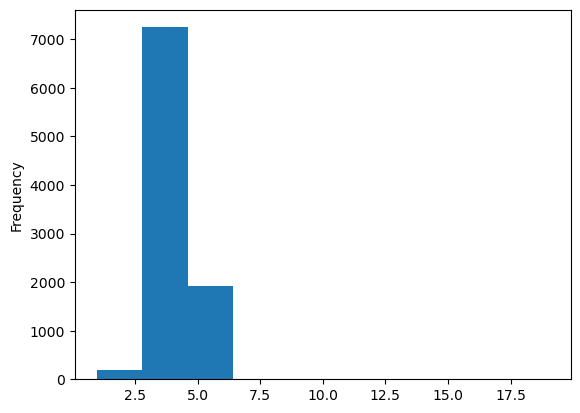

In [21]:
#Plotting histogram of Rating
data['Rating'].plot(kind='hist')

plt.show()



<AxesSubplot:ylabel='Frequency'>

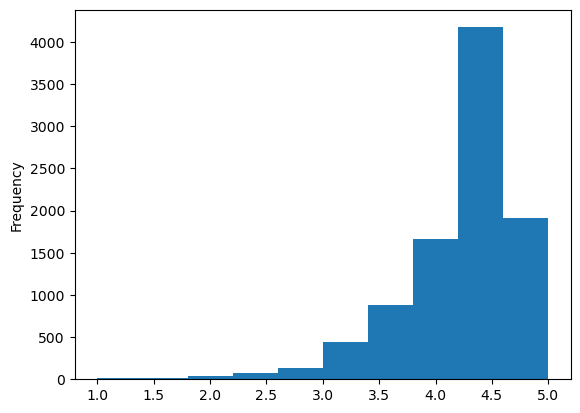

In [32]:

#Subsetting the dataframe based on `Rating` column
data=data[data['Rating']<=5]

#Storing the value counts of `Rating`
ratings=data['Rating'].value_counts()

#Plotting histogram of Rating
data['Rating'].plot(kind='hist')   

#Code ends here

## Data cleaning - Null values

In [26]:
#Sum of null values of each column
total_null = data.isnull().sum()

#Percentage of null values of each column
percent_null = (total_null/data.isnull().count())

#Concatenating total_null and percent_null values
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
#missing_data_3 = pd.concat([total_null, percent_null], axis=0, keys=['Total & Percent'])

print(missing_data)
#print(missing_data_3)

                Total   Percent
App                 0  0.000000
Category            0  0.000000
Rating              0  0.000000
Reviews             0  0.000000
Size                0  0.000000
Installs            0  0.000000
Type                0  0.000000
Price               0  0.000000
Content Rating      0  0.000000
Genres              0  0.000000
Last Updated        0  0.000000
Current Ver         4  0.000427
Android Ver         2  0.000214


In [27]:
#Dropping the null values
data.dropna(inplace = True)

#Sum of null values of each column
total_null_1 = data.isnull().sum()

#Percentage of null values of each column
percent_null_1 = (total_null_1/data.isnull().count())

#Concatenating total_null and percent_null values
missing_data_1 = pd.concat([total_null_1, percent_null_1], axis=1, keys=['Total', 'Percent'])

print(missing_data_1)

                Total  Percent
App                 0      0.0
Category            0      0.0
Rating              0      0.0
Reviews             0      0.0
Size                0      0.0
Installs            0      0.0
Type                0      0.0
Price               0      0.0
Content Rating      0      0.0
Genres              0      0.0
Last Updated        0      0.0
Current Ver         0      0.0
Android Ver         0      0.0


In [33]:
data.fillna(data.mean(),inplace = True)

/var/folders/47/6_2qby5d77z_jlzjm4k3thsr0000gn/T/ipykernel_79076/3833177975.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(),inplace = True)


In [30]:
total_null_1 = data.isnull().sum()

#Percentage of null values of each column
percent_null_1 = (total_null_1/data.isnull().count())

#Concatenating total_null and percent_null values
missing_data_1 = pd.concat([total_null_1, percent_null_1], axis=1, keys=['Total', 'Percent'])

print(missing_data_1)

                Total  Percent
App                 0      0.0
Category            0      0.0
Rating              0      0.0
Reviews             0      0.0
Size                0      0.0
Installs            0      0.0
Type                0      0.0
Price               0      0.0
Content Rating      0      0.0
Genres              0      0.0
Last Updated        0      0.0
Current Ver         0      0.0
Android Ver         0      0.0


### What else can we do to fill the missing data? 

- put 0 for the value
- put mean of the column
- put median of the column
- or if there is any string data, fill it with 'Unknown'

## Category vs Rating



Text(0.5, 1.0, 'Rating vs Category [BoxPlot]')

<Figure size 1500x1500 with 0 Axes>

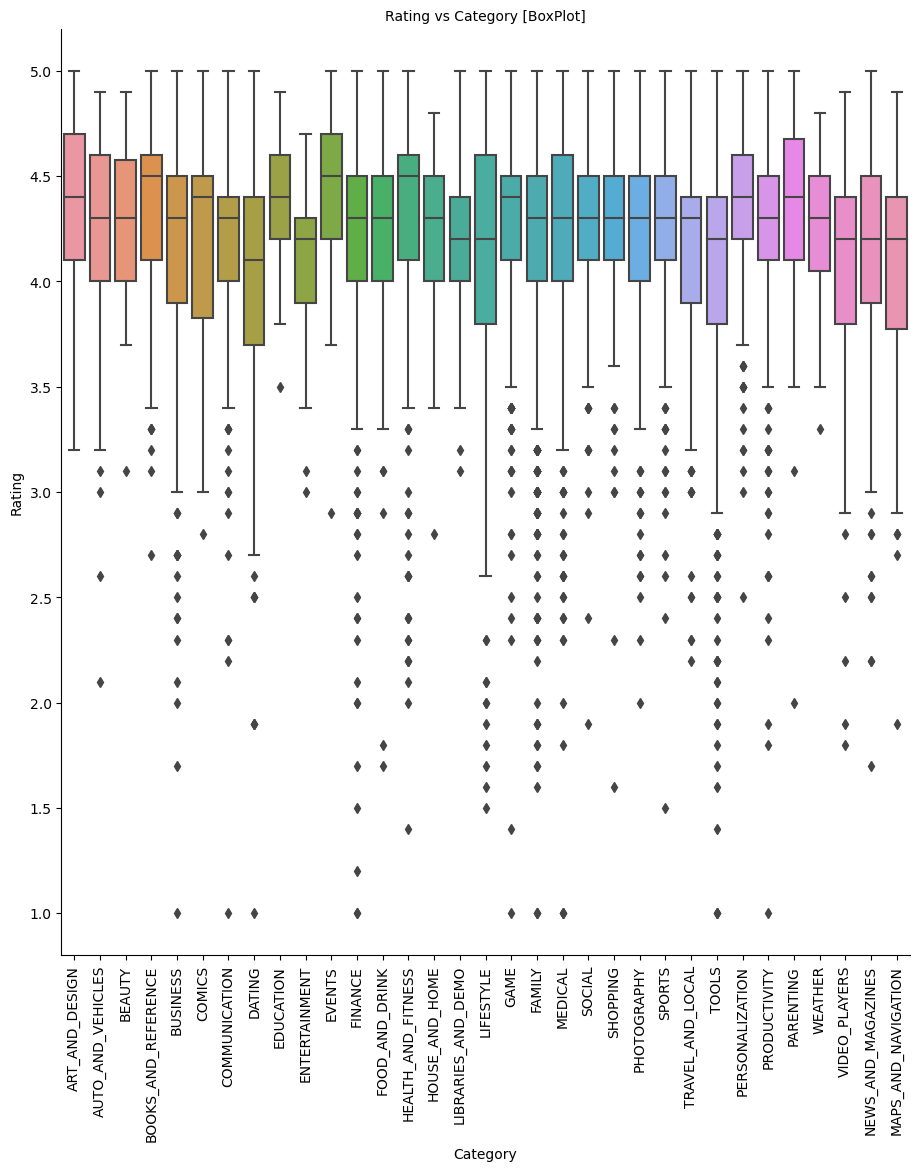

In [41]:
#Category vs Rating

#Setting the figure size
plt.figure(figsize=(15,15))

#Plotting boxplot between Rating and Category
cat= sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10)

#Rotating the xlabel rotation
cat.set_xticklabels(rotation=90)

#Setting the title of the plot
plt.title('Rating vs Category [BoxPlot]',size = 10)



In [38]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

/var/folders/47/6_2qby5d77z_jlzjm4k3thsr0000gn/T/ipykernel_79076/2578363689.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$','')


Text(0.5, 1.0, 'Rating vs Price[Reg Plot]')

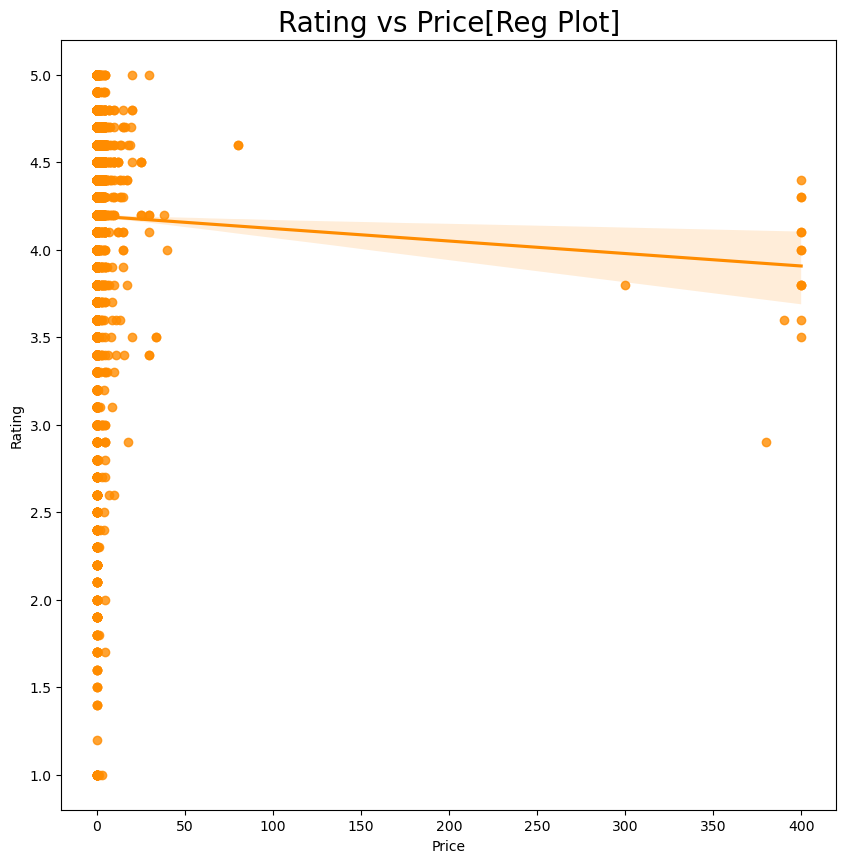

In [42]:
#Removing the dollar sign from the column
data['Price'] = data['Price'].str.replace('$','')

#Converting the column to float
data['Price'] = data['Price'].astype(float)

#Setting the figure size
plt.figure(figsize = (10,10))

#Plotting Regression plot between Rating and Price
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data)

#Setting the plot title
plt.title('Rating vs Price[Reg Plot]',size = 20)


##  Genre vs Rating

In [43]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [46]:
str1 = 'entertainment;books'
str1.split(';')[0]

'entertainment'

In [47]:
#Splitting the column to include only the first genre of each app
data['Genres'] = data['Genres'].str.split(';').str[0]


In [48]:
data['Genres'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [49]:
#Grouping Genres and Rating
gr_mean=data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean()

print(gr_mean.describe())


          Rating
count  48.000000
mean    4.212051
std     0.103459
min     3.970769
25%     4.132114
50%     4.204821
75%     4.286532
max     4.435556


In [50]:
gr_mean

,Genres,Rating
0,Action,4.286667
1,Adventure,4.219101
2,Arcade,4.308072
3,Art & Design,4.349231
4,Auto & Vehicles,4.190411
5,Beauty,4.278571
6,Board,4.300000
7,Books & Reference,4.344444
8,Business,4.121452
9,Card,4.102083


In [51]:
#Genre vs Rating





#Sorting the grouped dataframe by Rating
gr_mean=gr_mean.sort_values('Rating')



In [52]:
#Finding the length of unique genres
print( len(data['Genres'].unique()) , "genres")

48 genres


In [53]:
gr_mean

,Genres,Rating
14,Dating,3.970769
44,Trivia,4.039286
42,Tools,4.047411
25,Maps & Navigation,4.051613
45,Video Players & Editors,4.063190
24,Lifestyle,4.095556
17,Entertainment,4.101386
9,Card,4.102083
43,Travel & Local,4.109292
16,Educational,4.109709


In [54]:
print(gr_mean.head(1))

    Genres    Rating
14  Dating  3.970769


In [55]:
print(gr_mean.tail(1))

    Genres    Rating
18  Events  4.435556
